In [1]:
# CNN on Fashion MNIST (Keras)
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. Load dataset
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 2. Normalize and reshape
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [4]:
# 3. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 4. Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# 5. Train
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=2)

Epoch 1/10
1688/1688 - 46s - 27ms/step - accuracy: 0.8357 - loss: 0.4572 - val_accuracy: 0.8803 - val_loss: 0.3309
Epoch 2/10
1688/1688 - 46s - 27ms/step - accuracy: 0.8878 - loss: 0.3069 - val_accuracy: 0.8963 - val_loss: 0.2799
Epoch 3/10
1688/1688 - 45s - 27ms/step - accuracy: 0.9039 - loss: 0.2605 - val_accuracy: 0.8883 - val_loss: 0.3030
Epoch 4/10
1688/1688 - 44s - 26ms/step - accuracy: 0.9148 - loss: 0.2291 - val_accuracy: 0.9042 - val_loss: 0.2601
Epoch 5/10
1688/1688 - 46s - 27ms/step - accuracy: 0.9241 - loss: 0.2027 - val_accuracy: 0.9153 - val_loss: 0.2378
Epoch 6/10
1688/1688 - 80s - 47ms/step - accuracy: 0.9332 - loss: 0.1790 - val_accuracy: 0.8992 - val_loss: 0.2727
Epoch 7/10
1688/1688 - 80s - 48ms/step - accuracy: 0.9406 - loss: 0.1586 - val_accuracy: 0.9130 - val_loss: 0.2399
Epoch 8/10
1688/1688 - 45s - 26ms/step - accuracy: 0.9482 - loss: 0.1386 - val_accuracy: 0.9138 - val_loss: 0.2496
Epoch 9/10
1688/1688 - 43s - 25ms/step - accuracy: 0.9543 - loss: 0.1220 - val_a

In [7]:
# 6. Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9061 - loss: 0.3308
✅ Test Accuracy: 0.9058


In [8]:
# 7. Prediction Visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


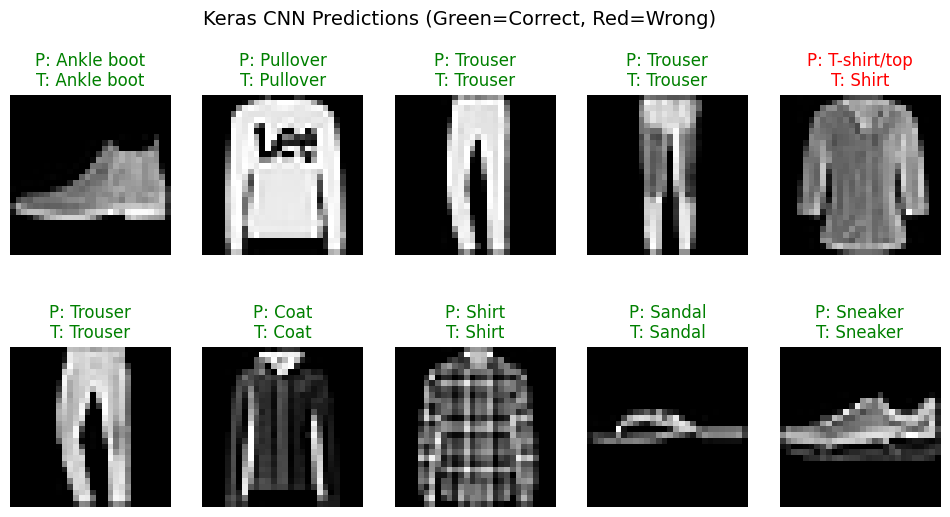

In [10]:
# Show 10 test images with predictions
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    color = 'green' if pred_labels[i] == y_test[i] else 'red'
    plt.title(f"P: {class_names[pred_labels[i]]}\nT: {class_names[y_test[i]]}", color=color)
    plt.axis('off')
plt.suptitle("Keras CNN Predictions (Green=Correct, Red=Wrong)", fontsize=14)
plt.show()

In [42]:
# CNN on Fashion MNIST (PyTorch)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [36]:
# Load and preprocess data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [37]:
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

In [38]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [49]:
# Define CNN model with dropout
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.dropout = nn.Dropout(0.25)   # Dropout layer to prevent overfitting
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)

In [50]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


In [51]:
# Train the model
epochs = 15
print("Training started...")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Training finished!")


Training started...
Epoch [1/15], Loss: 0.5046
Epoch [2/15], Loss: 0.3397
Epoch [3/15], Loss: 0.2945
Epoch [4/15], Loss: 0.2637
Epoch [5/15], Loss: 0.2423
Epoch [6/15], Loss: 0.2241
Epoch [7/15], Loss: 0.2055
Epoch [8/15], Loss: 0.1894
Epoch [9/15], Loss: 0.1767
Epoch [10/15], Loss: 0.1626
Epoch [11/15], Loss: 0.1532
Epoch [12/15], Loss: 0.1429
Epoch [13/15], Loss: 0.1320
Epoch [14/15], Loss: 0.1210
Epoch [15/15], Loss: 0.1169
Training finished!


In [52]:
# Save the trained model
torch.save(model.state_dict(), "fashion_cnn.pth")
print("✅ Model saved successfully as 'fashion_cnn.pth'")

✅ Model saved successfully as 'fashion_cnn.pth'


In [53]:
# Visualization
model.eval()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [54]:
# Get one batch of test data
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, preds = torch.max(outputs, 1)

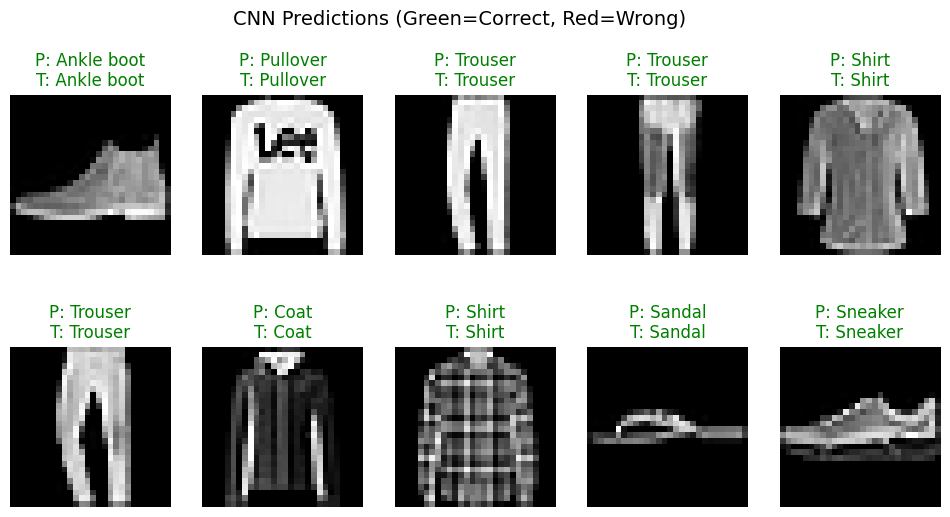

In [55]:
# Show first 10 images with predictions
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    img = images[i].cpu().squeeze()
    plt.imshow(img, cmap='gray')
    color = 'green' if preds[i] == labels[i] else 'red'
    plt.title(f"P: {class_names[preds[i]]}\nT: {class_names[labels[i]]}", color=color)
    plt.axis('off')
plt.suptitle("CNN Predictions (Green=Correct, Red=Wrong)", fontsize=14)
plt.show()

In [56]:
# Accuracy Evaluation
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"✅ Test Accuracy: {accuracy:.2f}%")

✅ Test Accuracy: 91.40%
